# **Yoga Poses** (deep learning)



* **Our goal for this project** is to build deep learning model on this data.


_______________________

### **Introduction**
Yoga Pose Image is a collection of the images for yoga exercises,The pictures mostly consists of one person doing a pose of yoga. In this project we aim to classify and predict the name of the pose

________________________

### **Data Description**
The datasets we selected are:

from Kaggle Yoga Pose Image classification dataset,the whole dataset.

from the website New Dataset for Yoga Pose Classification,200 pictures for each poses.

from kaggle Yoga Pose Image classification dataset,around 100 pictures for eash poses.

Which contains 5 Classes: (Tree Pose,Warrior1 Pose,Downward Dog Pose, Mountain Pose, Goddess Pose) and about 5499 pictures.



___________________

### **Setup**

*   Importing libraries and packages











In [2]:
# Data manipulation libraries:
# from google.colab                   import files
import numpy                        as np
# import zipfile
# import io
# Data Preprocessing libraries:
from tensorflow.keras.layers        import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models        import Sequential,Model
from tensorflow.keras.utils         import to_categorical
from sklearn.model_selection        import train_test_split
from tensorflow.keras.applications  import mobilenet_v2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot            as plt
import tensorflow                   as tf
import os
import cv2
import random
import keras
# Storage libraries:
import pickle 



#### Download dataset file

In [3]:
# from google.colab import files
# uploaded=files.upload()

In [4]:
# s=zipfile.ZipFile(io.BytesIO(uploaded["yoga_poses_1.zip"]),"r")
# s.extractall()

### **Dataset**

> The datasets we selected are: from Kaggle [Yoga_poses](https://www.kaggle.com/stpeteishii/yoga-pose-classify-albumentations-densenet201/data) and [**Yoga Pose Image classification dataset**](https://www.kaggle.com/shrutisaxena/yoga-pose-image-classification-dataset), from the website [**New Dataset for Yoga Pose Classification**](https://laurencemoroney.com/2021/08/23/yogapose-dataset.html)


*   Yoga Pose Image is a collection of the images for yoga exercises.





In [37]:
DATADIR =r'C:\Users\rawan\Downloads\yoga_poses\train'
CATOGORIES= ['downdog', 'goddess', 'mountain', 'tree', 'warrior1']

In [38]:
os.listdir(DATADIR)

['downdog', 'goddess', 'mountain', 'tree', 'warrior1']

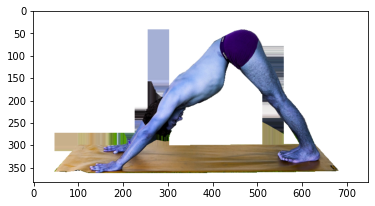

In [39]:
for category in CATOGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

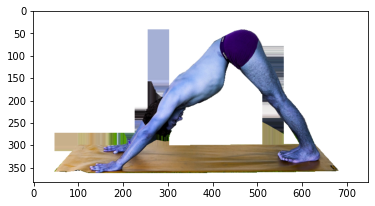

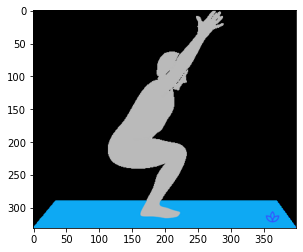

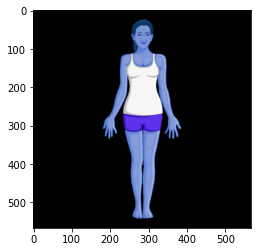

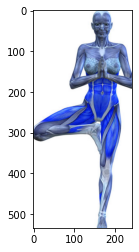

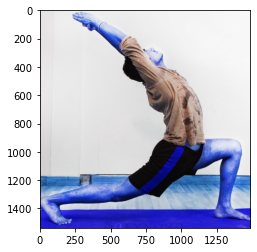

In [40]:
for category in CATOGORIES:
  path = os.path.join(DATADIR, category)
  for img in range(3):
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      plt.imshow(img_array, cmap='gray')
      plt.show()
      break
    break

In [41]:
print(img_array)
print(img_array.shape)

[[[232 230 230]
  [232 230 230]
  [232 230 230]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[232 230 230]
  [232 230 230]
  [232 230 230]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[232 230 230]
  [232 230 230]
  [232 230 230]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 ...

 [[ 38  32 209]
  [ 34  32 206]
  [ 36  33 209]
  ...
  [ 51  42 216]
  [ 52  43 217]
  [ 51  42 216]]

 [[ 39  33 210]
  [ 37  35 209]
  [ 38  35 211]
  ...
  [ 52  43 217]
  [ 53  44 218]
  [ 54  45 219]]

 [[ 41  35 212]
  [ 40  38 212]
  [ 40  37 213]
  ...
  [ 52  43 217]
  [ 53  44 218]
  [ 54  45 219]]]
(1537, 1488, 3)


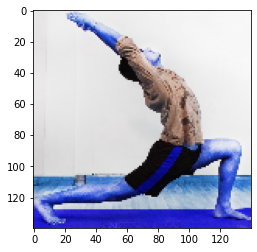

In [42]:
IMG_SIZE=140
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

### **Training** **data**


In [43]:
training_data = []

def making_trian_dataset():
    for category in CATOGORIES:
        path = os.path.join(DATADIR, category) # path to our data
        class_num = CATOGORIES.index(category)# classifcation index
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)).flatten()# resizing our imgz
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
making_trian_dataset()

In [44]:
print("Number of dataset elements: {}". format(len((training_data))))

Number of dataset elements: 3393


In [45]:
random.shuffle(training_data)
train_data, labels_data = zip(*training_data)

In [46]:
for sample in training_data[:10]: #making sure our data in train are shuffeled
    print(sample[1])

1
3
4
3
0
3
1
3
4
2


In [48]:
X= []
y= []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE,3)
y = to_categorical(y, num_classes = 5)

print("Number of dataset elements: {}". format(len((training_data))),'\n')
print("X total: ", X.shape,'\n')
print("Y total: ", y.shape,'\n')

Number of dataset elements: 3393 

X total:  (3393, 140, 140, 3) 

Y total:  (3393, 5) 



### **Save dataset** 

* (pickle)

In [25]:
pickle_save = open('X.pickle', 'wb')
pickle.dump(X, pickle_save)
pickle_save.close()

pickle_save = open('y.pickle', 'wb')
pickle.dump(y, pickle_save)
pickle_save.close()

In [26]:
pickle_read= open('X.pickle', 'rb')
X = pickle.load(pickle_read)
X[1]
#-------------------
pickle_read= open('y.pickle', 'rb')
y = pickle.load(pickle_read)
y[1]

array([0., 0., 0., 0., 1.], dtype=float32)

In [27]:
X = pickle.load(open('X.pickle','rb'))
y = pickle.load(open('y.pickle','rb'))

### **Split data**


* Scaling the data by /255
* Splitting the data (train 80%),(validation 20%) and (test 20%)





In [49]:
X = X/255.0
#split
# X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.25, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 
    
print("X train : ", len(X_train))
print("X validation : ", len(X_val))
print("Y train : ", len(y_train))
print("Y validation : ", len(y_val))
print("X test : ", len(X_test))
print("y test : ", len(y_test))


X train :  2035
X validation :  679
Y train :  2035
Y validation :  679
X test :  679
y test :  679


# **Modeling**
### model 1:

In [50]:
num_classes=5
model = Sequential()
# Conv layer
model.add(Conv2D(32, padding="same", kernel_size=(3,3), activation='relu', input_shape=(140,140,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Conv layer
model.add(Conv2D(64, padding="same", kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Conv layer
model.add(Conv2D(128, padding="same", kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Conv layer
model.add(Conv2D(256, padding="same", kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Dense layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 140, 140, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 70, 70, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 70, 70, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 70, 70, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 35, 35, 64)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 35, 35, 64)       

In [51]:

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model1_keras_last.h5',
        monitor='val_loss', save_best_only=True, verbose=2),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,verbose=2)
]

history = model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=100,
                    callbacks = callbacks_list,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/100
128/128 [==============================] - ETA: 0s - loss: 1.7472 - accuracy: 0.3302
Epoch 00001: val_loss improved from inf to 1.58230, saving model to model1_keras_last.h5
128/128 [==============================] - 56s 424ms/step - loss: 1.7472 - accuracy: 0.3302 - val_loss: 1.5823 - val_accuracy: 0.3373
Epoch 2/100
128/128 [==============================] - ETA: 0s - loss: 1.5685 - accuracy: 0.3366
Epoch 00002: val_loss improved from 1.58230 to 1.55844, saving model to model1_keras_last.h5
128/128 [==============================] - 55s 428ms/step - loss: 1.5685 - accuracy: 0.3366 - val_loss: 1.5584 - val_accuracy: 0.3373
Epoch 3/100
128/128 [==============================] - ETA: 0s - loss: 1.4748 - accuracy: 0.3695
Epoch 00003: val_loss improved from 1.55844 to 1.33941, saving model to model1_keras_last.h5
128/128 [==============================] - 54s 425ms/step - loss: 1.4748 - accuracy: 0.3695 - val_loss: 1.3394 - val_accuracy: 0.4551
Epoch 4/100
128/128 [===========

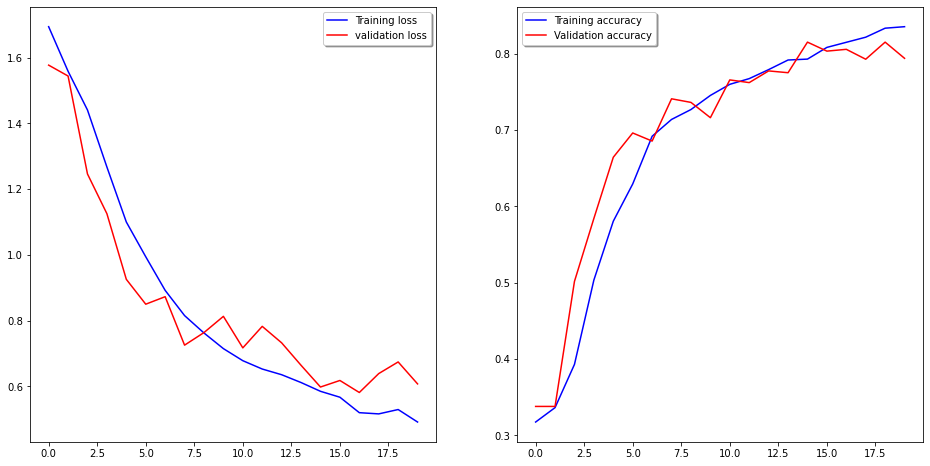

In [62]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Transfer learning:

In [ ]:
base_model = mobilenet_v2.MobileNetV2(weights = 'imagenet', include_top= False, input_shape= (140,140,3))

for layer in base_model.layers:
    layer.trainable= False

x = base_model.output
x = Flatten()(x)
x = Dense(100, activation = 'relu')(x)
x = Dense(50,activation='relu')(x)
predictions= Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [130]:
model.fit(X_train, Y_train)

80/80 [==============================] - 18s 206ms/step - loss: 1.7843 - accuracy: 0.7229


In [131]:
X_train.shape

(2544, 140, 140, 3)

In [132]:
# X_train_lr = X_train.reshape(2544,140*140*3)


In [133]:
# nsamples, nx, ny, m= X_train.shape
# d2_train_dataset = X_train.reshape((nsamples,nx*ny*m))

In [137]:
# X_train_lr.shape

(2544, 140, 140, 3)

In [135]:
# X_train_lr, Y_train_lr = X_train, Y_train

In [173]:
# X_train_lr,shape, Y_train_lr.shape= (2544,140*140*3), (2544,140*140*3)

In [163]:
# X_train_lr = X_train.reshape(X_train.shape[0], -1).T
# Y_train_lr = Y_train.reshape(Y_train.shape[0], -1).T

In [169]:
# print(X_train_lr.shape)
# print(Y_train_lr.shape)

(58800, 2544)
(5, 2544)


In [170]:
# from sklearn.linear_model import LogisticRegression

In [172]:
# clf = LogisticRegression(penalty='none', 
#                          tol=0.1, solver='saga',
#                          multi_class='multinomial').fit(X_train_lr, Y_train_lr.ravel())

# #to check the shape of the coefficient matrix
# clf.coef_.shape

In [52]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
val_dir = r'C:\Users\rawan\Downloads\yoga_poses\val'

train_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
       DATADIR,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)

val_gen = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')

Found 3391 images belonging to 5 classes.
Found 1358 images belonging to 5 classes.


# Model 2:

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                          input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 17, 17, 64)      

In [54]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', 
             optimizer= RMSprop(lr=0.001),
             metrics=['accuracy'])

In [55]:
history = model.fit(
train_gen,
steps_per_epoch=100,
epochs=15,
validation_data=val_gen,
validation_steps=50,
verbose=2)

Epoch 1/15
100/100 - 143s - loss: 1.5607 - accuracy: 0.4310 - val_loss: 1.0987 - val_accuracy: 0.5620 - 143s/epoch - 1s/step
Epoch 2/15
100/100 - 143s - loss: 0.9661 - accuracy: 0.6359 - val_loss: 0.7089 - val_accuracy: 0.7270 - 143s/epoch - 1s/step
Epoch 3/15
100/100 - 141s - loss: 0.6695 - accuracy: 0.7640 - val_loss: 0.4154 - val_accuracy: 0.8540 - 141s/epoch - 1s/step
Epoch 4/15
100/100 - 135s - loss: 0.4553 - accuracy: 0.8385 - val_loss: 0.2693 - val_accuracy: 0.9200 - 135s/epoch - 1s/step
Epoch 5/15
100/100 - 132s - loss: 0.2835 - accuracy: 0.9090 - val_loss: 0.1457 - val_accuracy: 0.9570 - 132s/epoch - 1s/step
Epoch 6/15
100/100 - 133s - loss: 0.2104 - accuracy: 0.9377 - val_loss: 0.0987 - val_accuracy: 0.9720 - 133s/epoch - 1s/step
Epoch 7/15
100/100 - 136s - loss: 0.1382 - accuracy: 0.9598 - val_loss: 0.0708 - val_accuracy: 0.9860 - 136s/epoch - 1s/step
Epoch 8/15
100/100 - 133s - loss: 0.1108 - accuracy: 0.9709 - val_loss: 0.0692 - val_accuracy: 0.9800 - 133s/epoch - 1s/step


In [ ]:
# pip install split-folders tqdm

In [ ]:
# import splitfolders as split_folders
# split_folders.ratio(DATADIR, output="output", seed=3391, ratio=(.6, 0.4)) 

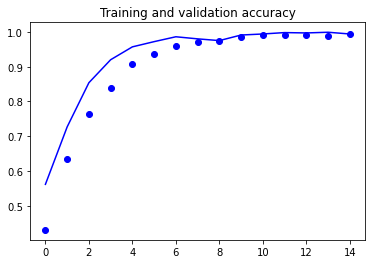

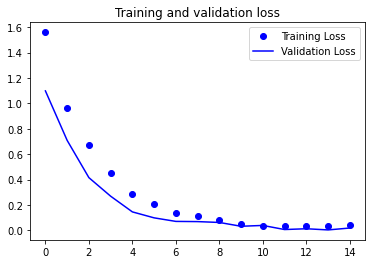

In [56]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Image augmentation:
### Model 3:

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                          input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')

])
model.summary()


train_gen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_gen = train_datagen.flow_from_directory(
        DATADIR, 
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_gen = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy', 
             optimizer= RMSprop(lr=0.001),
             metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [31]:
history = model.fit(
      train_gen,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=40,
      validation_data=validation_gen,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/40
100/100 - 124s - loss: 1.6006 - accuracy: 0.4209 - val_loss: 1.1393 - val_accuracy: 0.5470 - 124s/epoch - 1s/step
Epoch 2/40
100/100 - 53s - loss: 0.9316 - accuracy: 0.6760 - val_loss: 0.7047 - val_accuracy: 0.7590 - 53s/epoch - 534ms/step
Epoch 3/40
100/100 - 52s - loss: 0.6656 - accuracy: 0.7655 - val_loss: 0.5074 - val_accuracy: 0.8520 - 52s/epoch - 524ms/step
Epoch 4/40
100/100 - 52s - loss: 0.4919 - accuracy: 0.8393 - val_loss: 0.2897 - val_accuracy: 0.9260 - 52s/epoch - 515ms/step
Epoch 5/40
100/100 - 53s - loss: 0.3321 - accuracy: 0.8930 - val_loss: 0.2118 - val_accuracy: 0.9340 - 53s/epoch - 525ms/step
Epoch 6/40
100/100 - 55s - loss: 0.2362 - accuracy: 0.9240 - val_loss: 0.1460 - val_accuracy: 0.9640 - 55s/epoch - 548ms/step
Epoch 7/40
100/100 - 54s - loss: 0.1976 - accuracy: 0.9397 - val_loss: 0.0861 - val_accuracy: 0.9820 - 54s/epoch - 535ms/step
Epoch 8/40
100/100 - 54s - loss: 0.1011 - accuracy: 0.9730 - val_loss: 0.0456 - val_accuracy: 0.9820 - 54s/epoch - 537m

In [32]:
#tf.keras.models.save_model(model,'my_last_model1.hdf5')

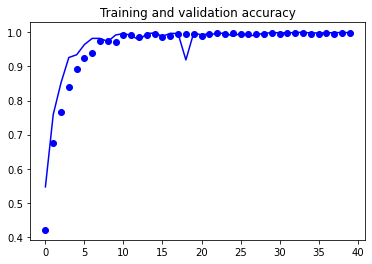

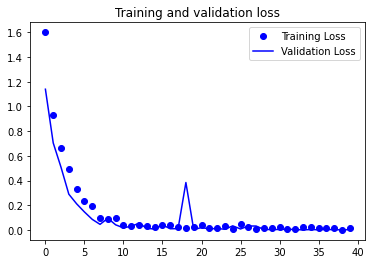

<Figure size 432x288 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
plt.savefig("lastmodel.png");

# Testing the model:

In [23]:
test_dir = r'C:\Users\rawan\Downloads\yoga_poses\test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20)

Found 748 images belonging to 5 classes.


In [24]:
#model.save(r'C:\Users\rawan\Downloads\yoga_poses\model')

In [25]:
model= keras.models.load_model(r'C:\Users\rawan\Downloads\yoga_poses\model')

In [26]:
model.evaluate(test_gen)

 4/38 [==>...........................] - ETA: 22s - loss: 3.3730 - accuracy: 0.8500

C:\Users\rawan\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 [==============================] - 25s 629ms/step - loss: 2.4617 - accuracy: 0.9144


[2.461688280105591, 0.9144384860992432]

In [42]:
predctions = np.round(model.predict(test_gen),5)
print('predctions',predctions)

predctions [[0.0000e+00 0.0000e+00 9.8003e-01 0.0000e+00 0.0000e+00]
 [0.0000e+00 9.9999e-01 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 1.6000e-04 0.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 1.5120e-02 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00]]


# The app:

In [ ]:
# tf.keras.models.save_model(model,'my_last_model.hdf5')

In [16]:
model= keras.models.load_model(r'C:\Users\rawan\Downloads\yoga_poses\model')

In [17]:
# pip install streamlit

In [18]:
import tensorflow as tf
model = tf.keras.models.load_model('my_last_model.hdf5')

In [19]:
import streamlit as stffol
st.write("""
         # Rock-Paper-Scissor Hand Sign Prediction
         """
         )
st.write("This is a simple image classification web app to predict yoga poses names")
file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

2021-12-05 12:15:18.066 
  command:

    streamlit run C:\Users\rawan\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [20]:
# streamlit run C:\Users\rawan\anaconda3\lib\site-packages\ipykernel_launcher.py

In [21]:
import cv2
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):
    
        size = (150,150)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img_resize[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    prediction = import_and_predict(image, model)
    
    if np.argmax(prediction) == 0:
        st.write("It is a paper!")
    elif np.argmax(prediction) == 1:
        st.write("It is a rock!")
    else:
        st.write("It is a scissor!")
    
    st.text("Probability (0: Paper, 1: Rock, 2: Scissor")
    st.write(prediction)